<a href="https://colab.research.google.com/github/pravincoder/Arrhythmia-Categorization/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Dependencies and Download the Dataset

In [1]:
# Install kagglehub (if not already installed)
!pip install kagglehub

# Import kagglehub and download the dataset
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("yasserhessein/heartbeat")
print("Path to dataset files:", path)

# List the dataset files
!ls -l $path


100%|██████████| 98.8M/98.8M [00:01<00:00, 60.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yasserhessein/heartbeat/versions/1
total 569144
-rw-r--r-- 1 root root 102892400 Feb 26 01:55 mitbih_test.csv
-rw-r--r-- 1 root root 411503800 Feb 26 01:55 mitbih_train.csv
-rw-r--r-- 1 root root  49378200 Feb 26 01:55 ptbdb_abnormal.csv
-rw-r--r-- 1 root root  19016200 Feb 26 01:55 ptbdb_normal.csv


## Load the Data

In [2]:
import pandas as pd

# Load the MIT-BIH train and test CSV files
train_df = pd.read_csv(path + "/mitbih_train.csv")
test_df = pd.read_csv(path + "/mitbih_test.csv")

# (Optional) If needed, the PTBDB files can be loaded as well:
# abnormal_df = pd.read_csv(path + "/ptbdb_abnormal.csv")
# normal_df = pd.read_csv(path + "/ptbdb_normal.csv")

# Display the first few rows of the training and test sets
print("Train DataFrame Head:")
display(train_df.head())
print("Test DataFrame Head:")
display(test_df.head())


Train DataFrame Head:


,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Test DataFrame Head:


,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualize a Sample ECG Signal

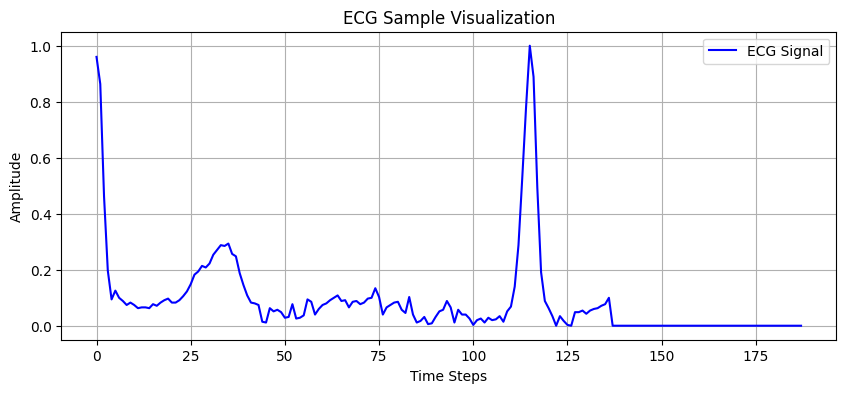

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Select the first ECG sample from the training data (all columns represent signal values except the last)
ecg_sample = train_df.iloc[0].values  # Convert the row to a NumPy array

# Create a time axis assuming uniform sampling
time = np.arange(len(ecg_sample))

# Plot the ECG waveform
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_sample, label="ECG Signal", color='b')
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.title("ECG Sample Visualization")
plt.legend()
plt.grid(True)
plt.show()


##Understand the Label Categories

The dataset’s labels (located in the last column) represent the following classes:

0 (Normal): Normal heartbeat

4 (Unknown/Q): Beats that are unclassified or of low quality

2 (Ventricular): Ventricular Ectopic Beat (abnormal beat from the ventricles)

1 (Supraventricular): Supraventricular Ectopic Beat (abnormal beat from above the ventricles)

3 (Fusion): Fusion beat (a blend of normal and abnormal impulses)

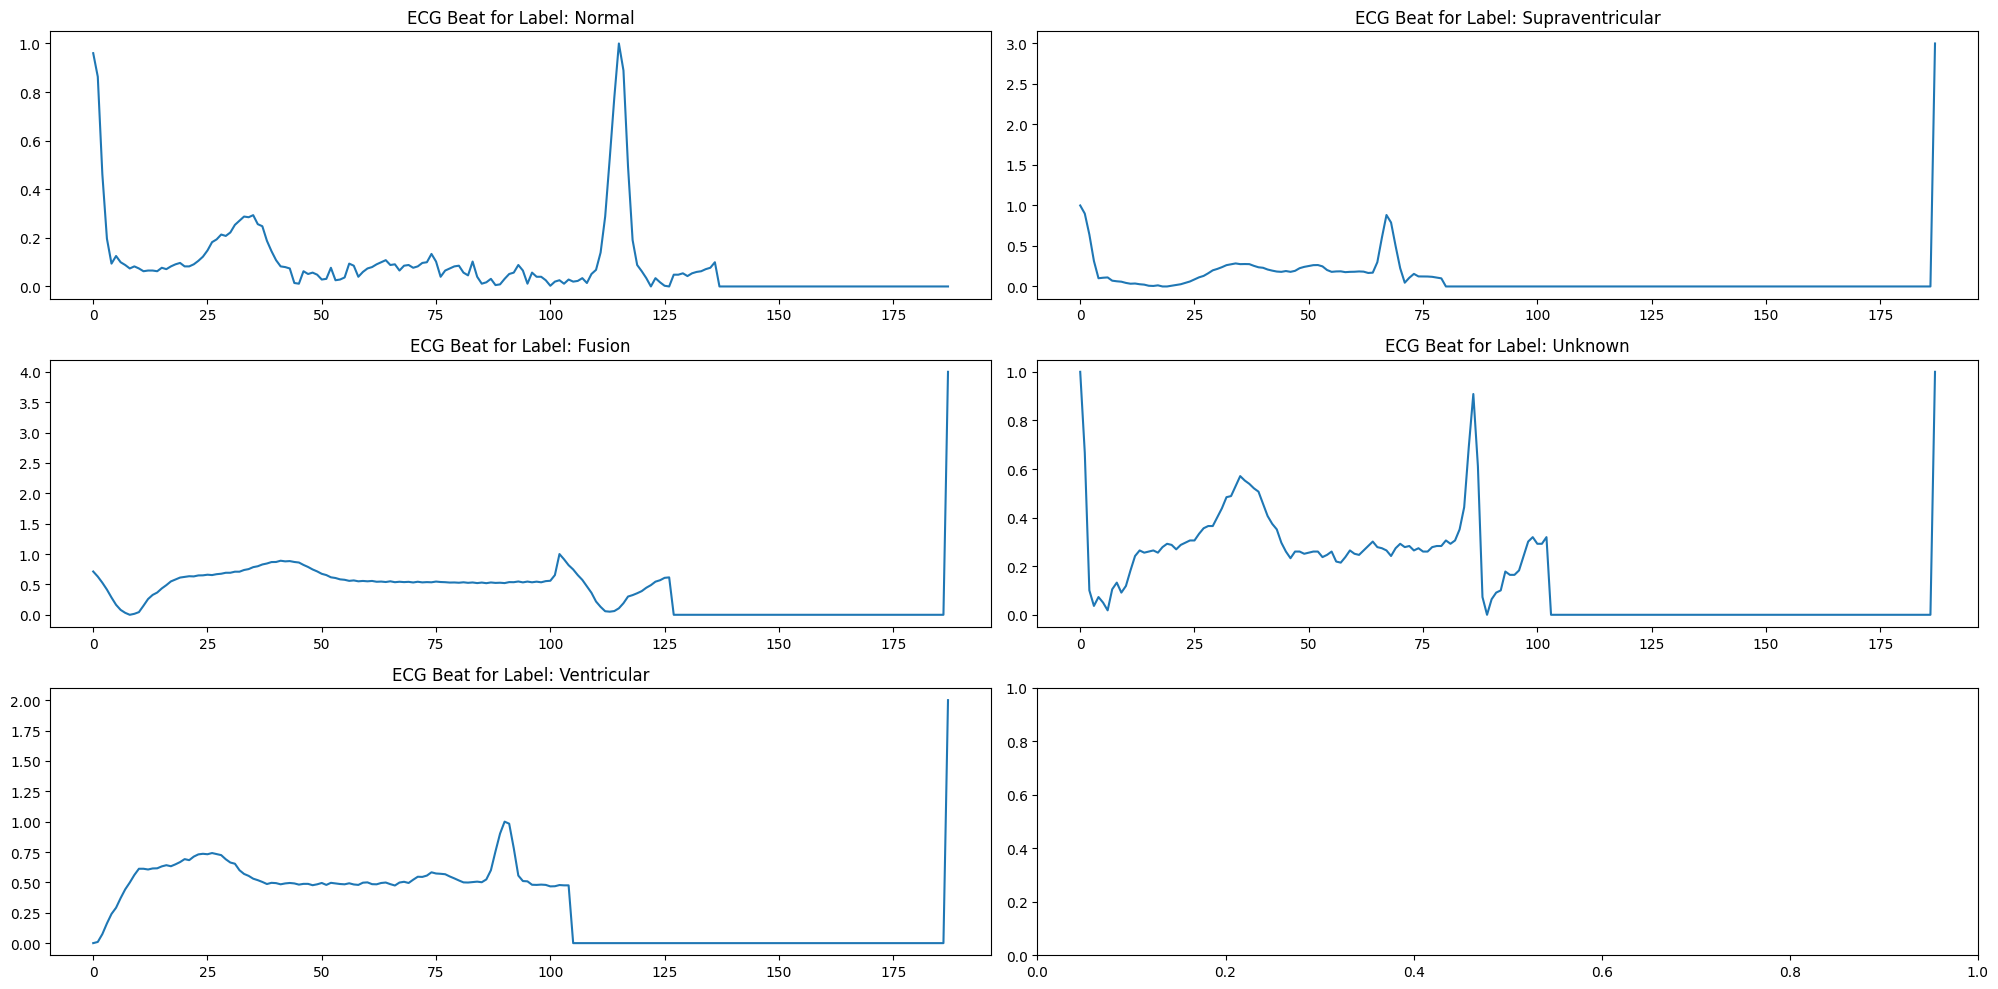

In [4]:
labels = ['Normal', 'Unknown', 'Ventricular', 'Supraventricular', 'Fusion']

# Create subplots to show one example from each category
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
for i in range(5):
    # Get the first ECG sample corresponding to the label i
    sample = train_df.loc[train_df.iloc[:, -1] == i].values[0]
    # Plot the sample
    ax[i % 3, i % 2].plot(sample)
    ax[i % 3, i % 2].set_title(f"ECG Beat for Label: {labels[i]}")
plt.tight_layout()
plt.show()


In [11]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Separate features (all columns except the last) and labels (last column)
X = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

print("Before SMOTE, X shape:", X.shape, "and y shape:", y.shape)
# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("After SMOTE, X shape:", X_resampled.shape, "and y shape:", y_resampled.shape)

# Reshape the features to be 3D for the CNN (samples, timesteps, channels)
# Here, we assume each ECG signal has 187 timesteps and 1 channel.
X_resampled = X_resampled.reshape(-1, 187, 1)
X_test = X_test.reshape(-1, 187, 1)

Before SMOTE, X shape: (87553, 187) and y shape: (87553,)
After SMOTE, X shape: (362350, 187) and y shape: (362350,)


# Modeling

Conv1D model arch

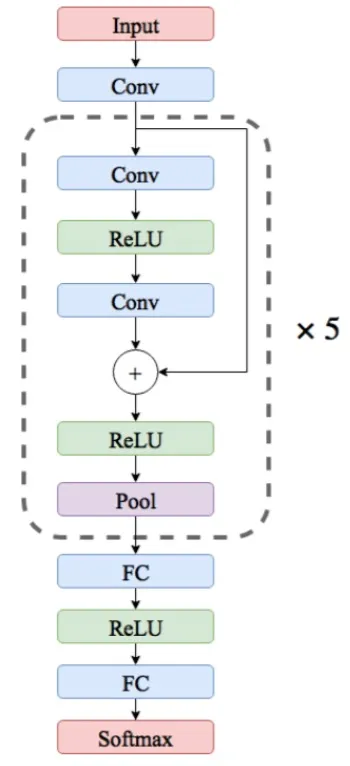


Con2d Model arch


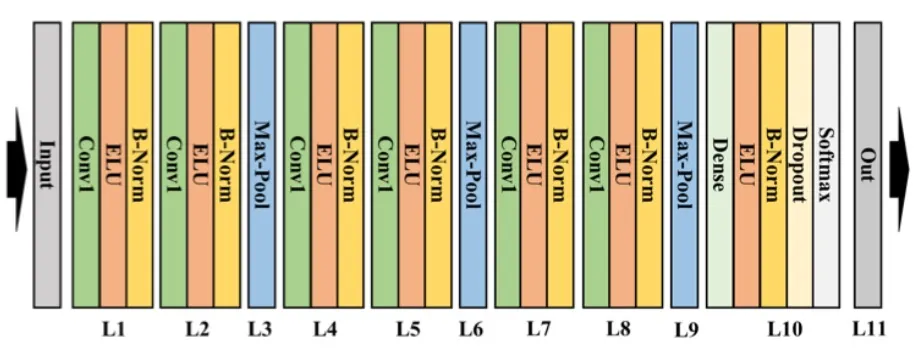

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, activations, losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization

def build_1d_cnn_sequential(input_shape=(187, 1), n_classes=5):
    model = models.Sequential()

    # Input layer
    model.add(layers.Input(shape=input_shape))

    # Block 1
    model.add(layers.Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))

    # Block 2
    model.add(layers.Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Dropout(0.2))

    # Block 3
    model.add(layers.Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(n_classes, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    model.summary()
    return model

# Build the model
model = build_1d_cnn_sequential()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 187, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 187, 64)             │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 93, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 93, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 93, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 46, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 46, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 46, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 46, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 23, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5888)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         376,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 759,237 (2.90 MB)

 Trainable params: 759,237 (2.90 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Build the model
model = build_1d_cnn_sequential(input_shape=(187, 1), n_classes=5)

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    X_resampled, y_resampled,
    epochs=5,
    batch_size=32,
    validation_split=0.2,  # or separate validation set
    verbose=1,
    callbacks=[early_stop, reduce_lr]
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 187, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 187, 64)             │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 93, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 93, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 93, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 46, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 46, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 46, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 46, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 23, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5888)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         376,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 759,237 (2.90 MB)

 Trainable params: 759,237 (2.90 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 70s 7ms/step - accuracy: 0.8634 - loss: 0.3692 - val_accuracy: 0.9675 - val_loss: 0.1170 - learning_rate: 0.0010
Epoch 2/5
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 57s 6ms/step - accuracy: 0.9634 - loss: 0.1090 - val_accuracy: 0.9869 - val_loss: 0.0462 - learning_rate: 0.0010
Epoch 3/5
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 79s 6ms/step - accuracy: 0.9756 - loss: 0.0733 - val_accuracy: 0.9816 - val_loss: 0.0569 - learning_rate: 0.0010
Epoch 4/5
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 0.9805 - loss: 0.0601 - val_accuracy: 0.9891 - val_loss: 0.0400 - learning_rate: 0.0010
Epoch 5/5
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 81s 6ms/step - accuracy: 0.9832 - loss: 0.0519 - val_accuracy: 0.9914 - val_loss: 0.0363 - learning_rate: 0.0010


685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9784 - loss: 0.0699
Test Loss: 0.1280
Test Accuracy: 97.47%


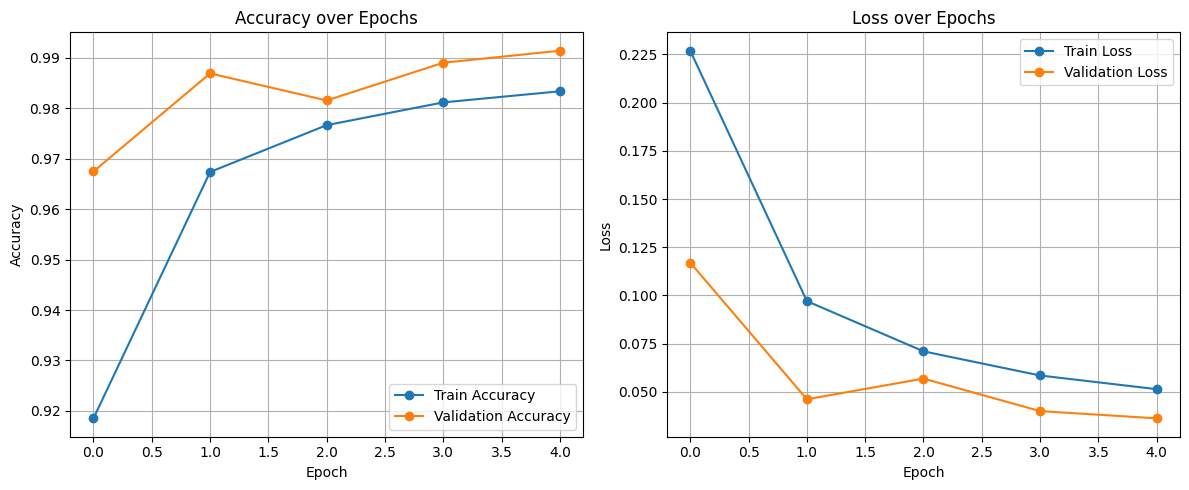

In [12]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
# Save the model
model.save('model_1d_cnn.h5')

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, activations, losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
def get_model():
    nclass = 5
    model = Sequential()
    model.add(layers.Input(shape=(187, 1, 1)))

    # ---------------- Block 1 ----------------
    model.add(BatchNormalization())  # B.Norm
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='elu'))  # Conv
    model.add(BatchNormalization())  # B.Norm
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='elu'))  # Conv
    model.add(MaxPooling2D(pool_size=(2,1)))  # MaxPool

    # ---------------- Block 2 ----------------
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2,1)))

    # ---------------- Block 3 ----------------
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2,1)))

    # Flatten feature maps before Dense layers
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(128, activation='elu'))
    model.add(BatchNormalization())

    # Dropout layer
    model.add(layers.Dropout(0.5))

    # Final output layer with Softmax
    model.add(Dense(nclass, activation='softmax'))

    opt = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

    model.summary()
    return model

# Build the model
model = get_model()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_12               │ (None, 187, 1, 1)           │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 187, 1, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 187, 1, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 187, 1, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 93, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 93, 1, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 93, 1, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 93, 1, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 93, 1, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 46, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 46, 1, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 46, 1, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 46, 1, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 46, 1, 128)          │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 23, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2944)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         376,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 665,833 (2.54 MB)

 Trainable params: 664,935 (2.54 MB)

 Non-trainable params: 898 (3.51 KB)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Prepare the test data: separate features and labels then reshape
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values
X_test = X_test.reshape(-1, 187, 1)

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model on the SMOTE-resampled data
history = model.fit(X_resampled, y_resampled,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop, reduce_lr])


Epoch 1/5
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - accuracy: 0.9091 - loss: 0.2738 - val_accuracy: 0.9622 - val_loss: 0.1057 - learning_rate: 0.0010
Epoch 2/5
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 61s 7ms/step - accuracy: 0.9776 - loss: 0.0674 - val_accuracy: 0.9775 - val_loss: 0.0681 - learning_rate: 0.0010
Epoch 3/5
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - accuracy: 0.9869 - loss: 0.0395 - val_accuracy: 0.9791 - val_loss: 0.0645 - learning_rate: 0.0010
Epoch 4/5
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 83s 7ms/step - accuracy: 0.9908 - loss: 0.0280 - val_accuracy: 0.9359 - val_loss: 0.2324 - learning_rate: 0.0010
Epoch 5/5
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 60s 7ms/step - accuracy: 0.9933 - loss: 0.0214 - val_accuracy: 0.9800 - val_loss: 0.0657 - learning_rate: 0.0010


In [25]:
# Evaluate the model on the test set
X_test = X_test.reshape(-1, 187, 1)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9843 - loss: 0.0545
Test Loss: 0.0981
Test Accuracy: 97.83%


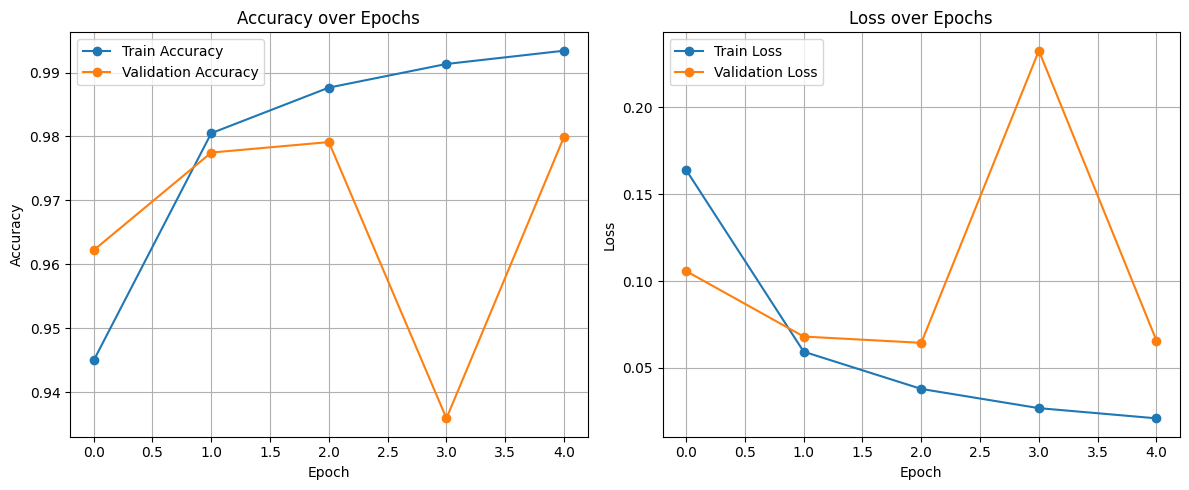

In [27]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [28]:
# Save model
model.save('model_2d_cnn.h5')